In [121]:
import pandas as pd
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

## Load lipid data

In [122]:
lipid_data_df = pd.read_csv(f'all_data.csv')
#lipid_data_df = lipid_data_df.set_index(['Date', 'Blood Type', 'Person'])

In [37]:
lipid_data_df

,Date,Blood Type,Person,Cer d18:2_16:0,Cer d18:1_18:0,Cer d18:1_18:1,Cer d18:1_16:0,Cer d18:1_20:0,Cer d18:1_22:0,Cer d18:1_24:0,...,LPC 22:6 SN1,LPC O-22:1,PC 18:0_16:0,PC 18:0_22:5,PC 19:0_20:4,PC O-18:0_22:4,PC O-18:2_20:4,PC O-24:2_20:4,PE O-18:3_20:4,PI 18:0_22:5
0,210625,Plasma,1,0.05,0.27,0.08,0.52,0.82,3.37,9.62,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,210625,Serum,1,0.05,0.30,0.08,0.58,0.84,4.08,11.54,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,210625,Blood EDTA - Serum,1,0.07,0.82,0.11,1.71,0.88,4.12,11.90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,210625,DBS - Venous,1,0.07,0.42,0.06,1.08,0.43,3.09,5.17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,210625,DBS - Finger,1,0.06,0.32,0.05,0.89,0.37,2.23,4.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,210702,Plasma,1,0.04,0.25,0.11,0.47,0.72,3.74,10.48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,210702,Serum,1,0.22,0.46,0.22,0.78,1.53,7.33,20.47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,210702,Blood EDTA - Serum,1,0.11,1.32,0.17,3.60,0.90,4.81,12.48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,210702,DBS - Venous,1,0.08,0.46,0.06,1.27,0.52,3.47,6.95,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,210702,DBS - Finger,1,0.04,0.33,0.06,0.80,0.33,2.21,4.14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Pair-wise scatter plots

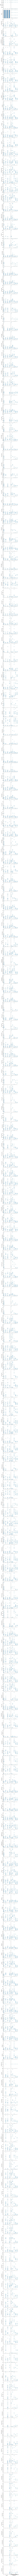

In [40]:
sns.pairplot(lipid_data_df, x_vars=["Person", 'Blood Type'])

In [123]:
pca = PCA(n_components=2)
lipid_data_df_without_na = lipid_data_df.dropna(axis='columns')
lipid_data_df_without_na = (lipid_data_df_without_na-
                            lipid_data_df_without_na.mean())/lipid_data_df_without_na.std()
projected_lipid_data = pca.fit_transform(lipid_data_df_without_na.drop(
    columns=['Person', 'Blood Type', 'Date']))

/tmp/ipykernel_51667/1025930631.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  lipid_data_df_without_na.mean())/lipid_data_df_without_na.std()


In [124]:
pca.explained_variance_ratio_

array([0.39384317, 0.21649259])

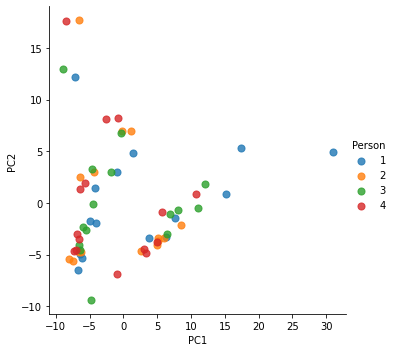

In [125]:
pc_df = pd.DataFrame(data = projected_lipid_data , 
        columns = ['PC1', 'PC2'])
pc_df['Blood Type'] = lipid_data_df['Blood Type']
pc_df['Person'] = lipid_data_df['Person']

lmplot_persons = sns.lmplot( x="PC1", y="PC2",
  data=pc_df, 
  fit_reg=False, 
  hue='Person', # color by cluster
  legend=True,
  scatter_kws={"s": 50}) # specify the point size
lmplot_persons.savefig('persons_pca.pdf')

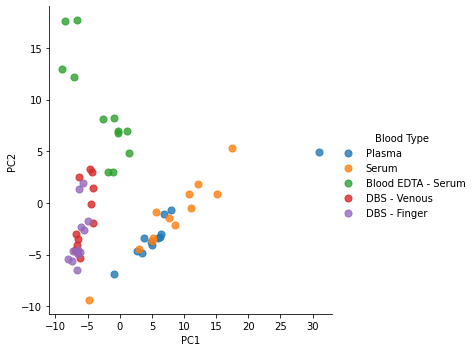

In [126]:
lmplot_type = sns.lmplot( x="PC1", y="PC2",
  data=pc_df, 
  fit_reg=False, 
  hue='Blood Type', # color by cluster
  legend=True,
  scatter_kws={"s": 50}) # specify the point size
lmplot_type.savefig('type_pca.pdf')

## t-SNE

In [127]:
tsne = TSNE(n_components=2, init='pca')
lipid_data_df_without_na = lipid_data_df.dropna(axis='columns')
lipid_data_df_without_na = (lipid_data_df_without_na-
                            lipid_data_df_without_na.mean())/lipid_data_df_without_na.std()
projected_lipid_data = tsne.fit_transform(lipid_data_df_without_na.drop(
    columns=['Person', 'Blood Type', 'Date']))

/tmp/ipykernel_51667/3671020367.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  lipid_data_df_without_na.mean())/lipid_data_df_without_na.std()
/home/tony/.virtualenvs/lipid-study/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/tony/.virtualenvs/lipid-study/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


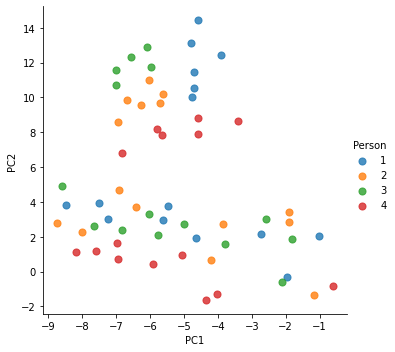

In [128]:
pc_df = pd.DataFrame(data = projected_lipid_data , 
        columns = ['PC1', 'PC2'])
pc_df['Blood Type'] = lipid_data_df['Blood Type']
pc_df['Person'] = lipid_data_df['Person']

lmplot_persons = sns.lmplot( x="PC1", y="PC2",
  data=pc_df, 
  fit_reg=False, 
  hue='Person', # color by cluster
  legend=True,
  scatter_kws={"s": 50}) # specify the point size
lmplot_persons.savefig('persons_tsne.pdf')

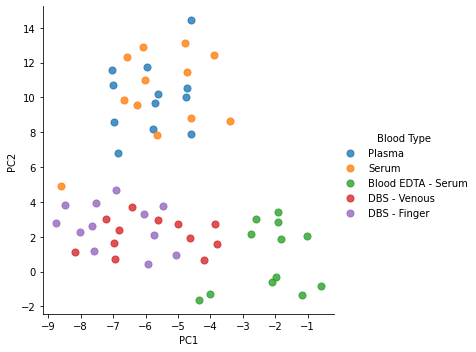

In [129]:
lmplot_type = sns.lmplot( x="PC1", y="PC2",
  data=pc_df, 
  fit_reg=False, 
  hue='Blood Type', # color by cluster
  legend=True,
  scatter_kws={"s": 50}) # specify the point size
lmplot_type.savefig('type_tsne.pdf')

## ANOVA

## Train classifier

In [130]:
lipid_data_df_without_na = lipid_data_df.dropna(axis='columns')

for i in range (1, 5):
    train_data =  lipid_data_df_without_na[lipid_data_df_without_na['Person'] == i]
    test_val = lipid_data_df_without_na[lipid_data_df_without_na['Person'] != i]
    print(test_val)

      Date          Blood Type  Person  Cer d18:2_16:0  Cer d18:1_16:0  \
15  210625              Plasma       2            0.07            0.31   
16  210625               Serum       2            0.08            0.44   
17  210625  Blood EDTA - Serum       2            0.13            1.88   
18  210625        DBS - Venous       2            0.07            1.47   
19  210625        DBS - Finger       2            0.04            0.76   
20  210702              Plasma       2            0.11            0.48   
21  210702               Serum       2            0.11            0.44   
22  210702  Blood EDTA - Serum       2            0.13            4.06   
23  210702        DBS - Venous       2            0.06            1.35   
24  210702        DBS - Finger       2            0.04            0.71   
25  210723              Plasma       2            0.05            0.35   
26  210723               Serum       2            0.08            0.35   
27  210723  Blood EDTA - Serum       2